# Electoral Bonds Data Analysis

## Electoral Bonds Buyer Data Analysis

### Adding the imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

### Creating the DataFrame

In [4]:
dfb = pd.read_csv("electroral_bonds_buyer_data.csv")

### Reading the data

In [5]:
dfb.head()

,Unnamed: 0,Date of Purchase,Purchaser Name,Denomination
0,0,12/Apr/2019,A B C INDIA LIMITED,100000
1,1,12/Apr/2019,A B C INDIA LIMITED,100000
2,2,12/Apr/2019,A B C INDIA LIMITED,1000000
3,3,12/Apr/2019,A B C INDIA LIMITED,1000000
4,4,12/Apr/2019,A B C INDIA LIMITED,100000


In [6]:
dfb.tail()

,Unnamed: 0,Date of Purchase,Purchaser Name,Denomination
18866,18866,11/Jan/2024,WESTWELL GASES PRIVATE LIMITED,10000000
18867,18867,11/Jan/2024,WESTWELL GASES PRIVATE LIMITED,10000000
18868,18868,11/Jan/2024,WESTWELL GASES PRIVATE LIMITED,10000000
18869,18869,11/Jan/2024,WESTWELL GASES PRIVATE LIMITED,10000000
18870,18870,11/Jan/2024,WESTWELL GASES PRIVATE LIMITED,10000000


### Exploring the data

In [7]:
dfb.shape

(18871, 4)

In [8]:
dfb.columns

Index(['Unnamed: 0', 'Date of Purchase', 'Purchaser Name', 'Denomination'], dtype='object')

In [9]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18871 entries, 0 to 18870
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        18871 non-null  int64 
 1   Date of Purchase  18871 non-null  object
 2   Purchaser Name    18871 non-null  object
 3   Denomination      18871 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 589.8+ KB


### Filtering and exploring the _null_ values

In [10]:
dfb.isnull().sum()

Unnamed: 0          0
Date of Purchase    0
Purchaser Name      0
Denomination        0
dtype: int64

### Data Types

In [12]:
dfb.dtypes

Unnamed: 0           int64
Date of Purchase    object
Purchaser Name      object
Denomination         int64
dtype: object

### Changing the column name "Unnamed: 0" to "id"

In [15]:
dfb.rename(columns = {"Unnamed: 0":"id"}, inplace = True)

In [17]:
dfb.head(2)

,id,Date of Purchase,Purchaser Name,Denomination
0,0,12/Apr/2019,A B C INDIA LIMITED,100000
1,1,12/Apr/2019,A B C INDIA LIMITED,100000


### Renaming the columns

In [18]:
dfb.rename(columns = {
    "Date of Purchase": "date_of_purchase",
    "Purchaser Name": "purchaser_name",
    "Denomination": "denomination"
}, inplace = True)

In [20]:
dfb.head(2)

,id,date_of_purchase,purchaser_name,denomination
0,0,12/Apr/2019,A B C INDIA LIMITED,100000
1,1,12/Apr/2019,A B C INDIA LIMITED,100000


### Converting the "date_of_purchase" column datatype to date-time format

In [22]:
dfb['date_of_purchase'] = pd.to_datetime(dfb['date_of_purchase'])

In [23]:
dfb.dtypes

id                           int64
date_of_purchase    datetime64[ns]
purchaser_name              object
denomination                 int64
dtype: object

In [24]:
dfb.head(2)

,id,date_of_purchase,purchaser_name,denomination
0,0,2019-04-12,A B C INDIA LIMITED,100000
1,1,2019-04-12,A B C INDIA LIMITED,100000


### Adding the "Year" column

In [26]:
dfb["Year"] = pd.to_datetime(dfb["date_of_purchase"]).dt.year

In [27]:
dfb.head(2)

,id,date_of_purchase,purchaser_name,denomination,Year
0,0,2019-04-12,A B C INDIA LIMITED,100000,2019
1,1,2019-04-12,A B C INDIA LIMITED,100000,2019


### Adding the "Month" column

In [28]:
dfb["Month"] = pd.to_datetime(dfb["date_of_purchase"]).dt.month

In [29]:
dfb.head(2)

,id,date_of_purchase,purchaser_name,denomination,Year,Month
0,0,2019-04-12,A B C INDIA LIMITED,100000,2019,4
1,1,2019-04-12,A B C INDIA LIMITED,100000,2019,4


## Research Questions

### Find all the unique purchasers of the electoral bonds

In [32]:
dfb["purchaser_name"].unique()

array(['A B C INDIA LIMITED',
       'ACROPOLIS MAINTENANCE SERVICES PRIVATE LIMITED',
       'ARIHANT ENTERPRISES', ..., 'VEDIKA VANIJYA PVT LTD-SELF A/C',
       'VIDUR GUPTA', 'VIHAAN AUTO VENTURES PRIVATE LIMITED'],
      dtype=object)

### Find the total sum of denomination done by each purchaser

In [41]:
dfb.groupby('purchaser_name')['denomination'].sum().sort_values(ascending = False)

purchaser_name
FUTURE GAMING AND HOTEL SERVICES PR               12080000000
MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED     8210000000
QWIKSUPPLYCHAINPRIVATELIMITED                      4100000000
HALDIA ENERGY LIMITED                              3770000000
VEDANTA LIMITED                                    3756500000
                                                     ...     
POONAM AGARWAL                                           1000
KUNAL GUPTA                                              1000
N RAMAMOORTHY                                            1000
ANKUR SINGHAL S O SH ANIL SIN                            1000
MR. SAMEER BHATIA                                        1000
Name: denomination, Length: 1316, dtype: int64

### Find the counts of purchases done for each year from 2019 to 2024

In [42]:
dfb["Year"].value_counts()

Year
2023    6399
2022    5314
2019    3154
2021    2647
2024     897
2020     460
Name: count, dtype: int64

### Describe the dataset

In [44]:
dfb.describe()

,id,date_of_purchase,denomination,Year,Month
count,18871.000000,18871,1.887100e+04,18871.000000,18871.000000
mean,9435.000000,2022-03-15 00:28:27.763234304,6.441372e+06,2021.743734,6.217953
min,0.000000,2019-04-12 00:00:00,1.000000e+03,2019.000000,1.000000
25%,4717.500000,2021-04-09 00:00:00,1.000000e+06,2021.000000,4.000000
50%,9435.000000,2022-07-06 00:00:00,1.000000e+07,2022.000000,5.000000
75%,14152.500000,2023-07-10 00:00:00,1.000000e+07,2023.000000,10.000000
max,18870.000000,2024-01-11 00:00:00,1.000000e+07,2024.000000,12.000000
std,5447.732801,NaN,4.538947e+06,1.485145,3.631799


### Get the yearly maximum and minimum of the denomination

In [47]:
dfb.groupby("Year")["denomination"].max()

Year
2019    10000000
2020    10000000
2021    10000000
2022    10000000
2023    10000000
2024    10000000
Name: denomination, dtype: int64

In [48]:
dfb.groupby("Year")["denomination"].min()

Year
2019    1000
2020    1000
2021    1000
2022    1000
2023    1000
2024    1000
Name: denomination, dtype: int64

### Find each purchaser's total, maximum and minimum denomination

In [49]:
dfb.groupby('purchaser_name')['denomination'].agg(['sum', 'max', 'min'])

,sum,max,min
purchaser_name,,,
14 REELS PLUS LLP,10000000,10000000,10000000
A B C INDIA LIMITED,4000000,1000000,100000
AAKANKSHA BAHETY,1000000,1000000,1000000
AALAYA CONSTRUCTIONS,10000000,10000000,10000000
AARISH SOLAR POWER PRIVATE LIMITED,20000000,10000000,10000000
...,...,...,...
YUVAN TRADING CONSULTANCY LLP,50000000,10000000,10000000
ZENSAR TECHNOLOGIES LTD,30000000,10000000,10000000
ZUVAN ENERGY PRIVATE LIMITED,10000000,10000000,10000000


## Visual Analysis

In [52]:
dfb.columns

Index(['id', 'date_of_purchase', 'purchaser_name', 'denomination', 'Year',
       'Month'],
      dtype='object')

### Total Purchases Over Time

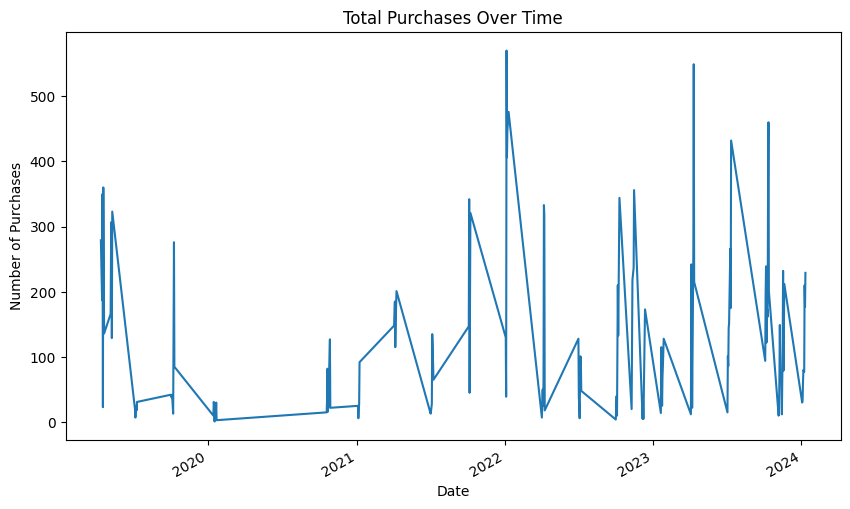

In [59]:
purchase_counts = dfb.groupby('date_of_purchase').size()

plt.figure(figsize=(10, 6))
purchase_counts.plot(kind='line')
plt.title('Total Purchases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Purchases')
plt.show()

### Total purchases by top 10 purchasers

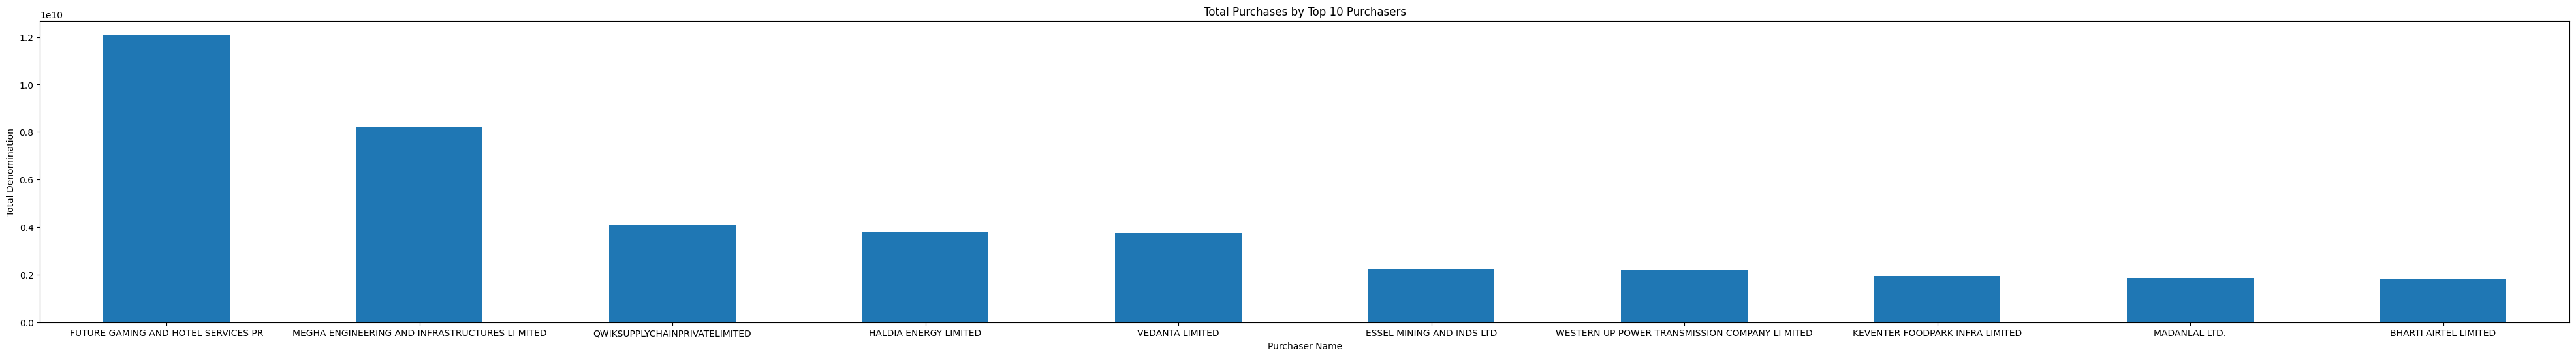

In [63]:
plt.figure(figsize=(50, 6))

purchase_by_purchaser = dfb.groupby('purchaser_name')['denomination'].sum()

top_10_purchasers = purchase_by_purchaser.sort_values(ascending=False).head(10)
top_10_purchasers.plot(kind='bar')

plt.title('Total Purchases by Top 10 Purchasers')
plt.xlabel('Purchaser Name')
plt.ylabel('Total Denomination')
plt.xticks(rotation=0)
plt.show()

### Monthly Purchase Trends over the years (2019 - 2024)

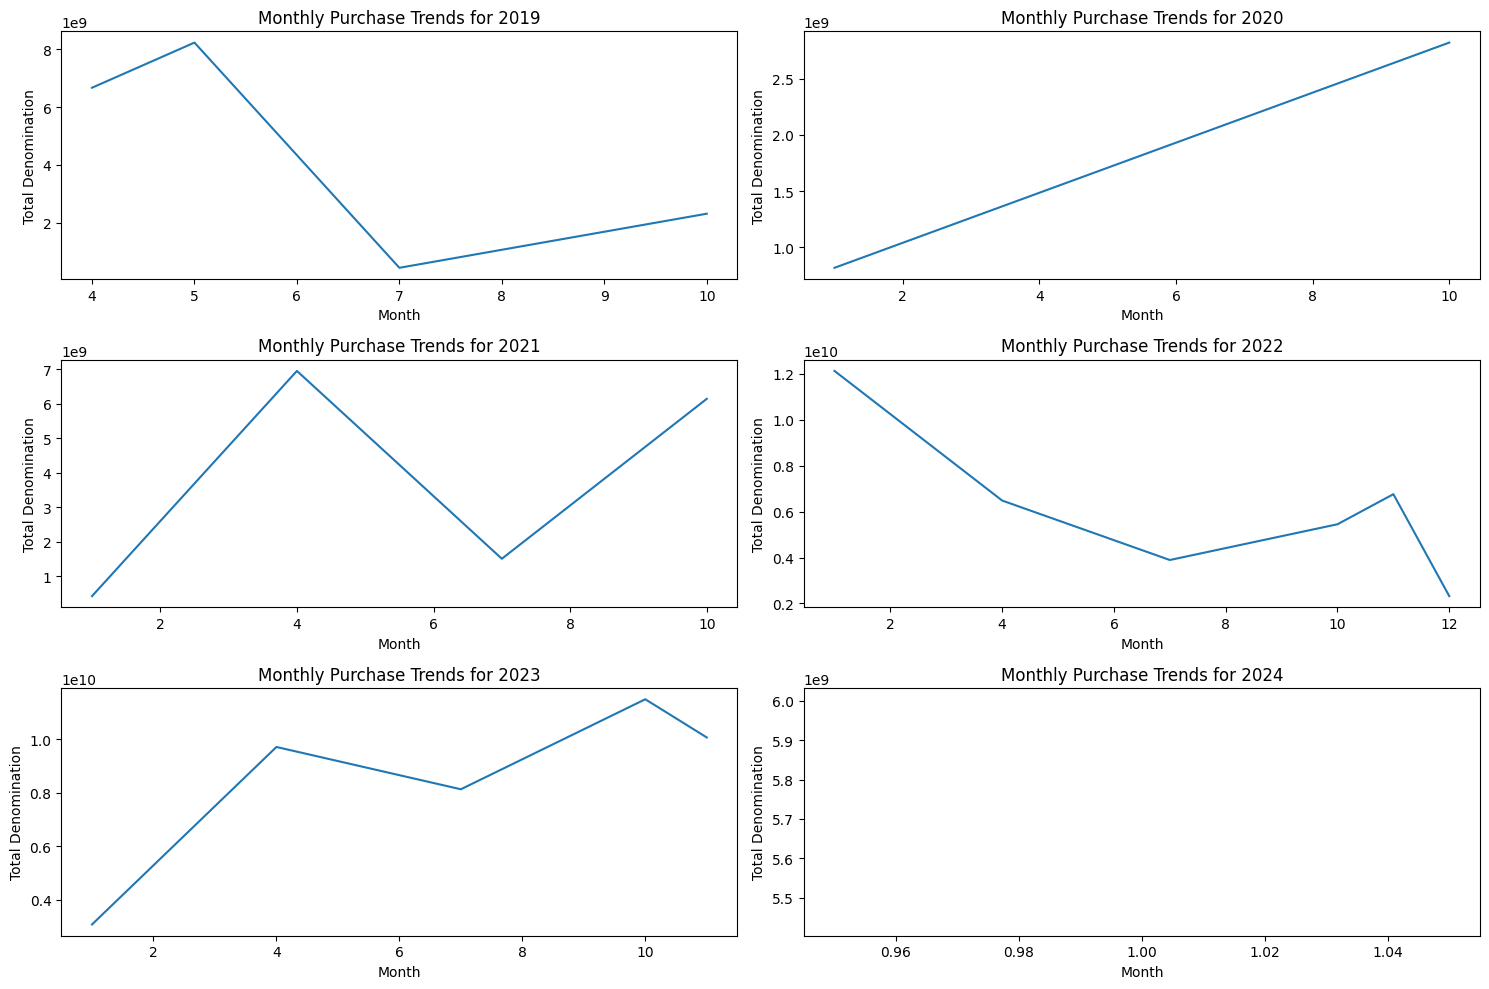

In [72]:
dfb_filtered = dfb[(dfb['Year'] >= 2019) & (dfb['Year'] <= 2024)]

fig, axs = plt.subplots(3, 2, figsize=(15, 10))

for i, year in enumerate(range(2019, 2025)):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    sb.lineplot(data=dfb_filtered[dfb_filtered['Year'] == year], x='Month', y='denomination', estimator=sum, errorbar=None, ax=ax)
    ax.set_title(f'Monthly Purchase Trends for {year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Total Denomination')

plt.tight_layout()
plt.show()

### Yearly Purchase Trends

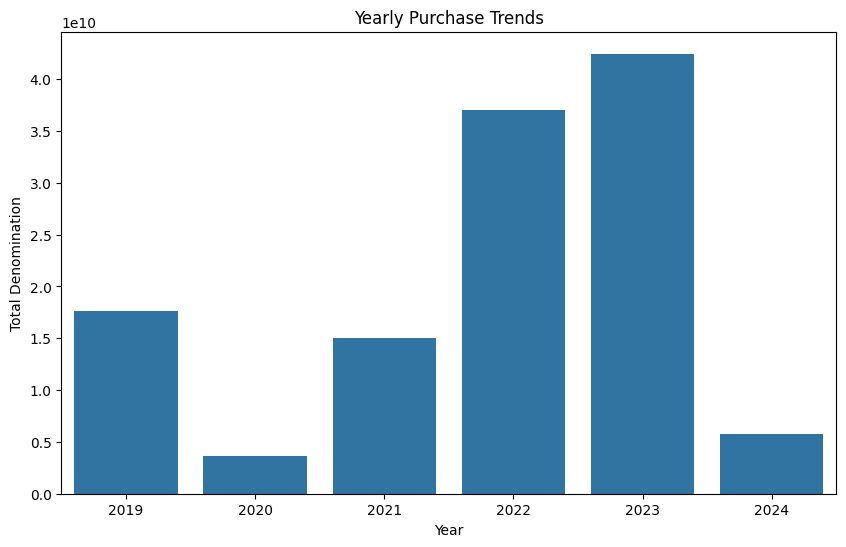

In [74]:
plt.figure(figsize=(10, 6))
sb.barplot(data=dfb, x='Year', y='denomination', estimator=sum, errorbar=None)
plt.title('Yearly Purchase Trends')
plt.xlabel('Year')
plt.ylabel('Total Denomination')
plt.show()

### Total Purchases by Month

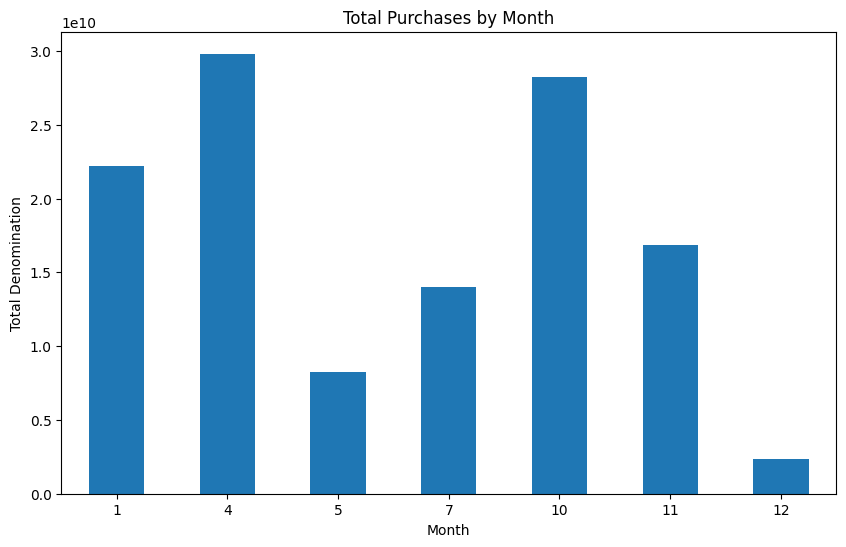

In [78]:
plt.figure(figsize=(10, 6))
purchase_by_month = dfb.groupby('Month')['denomination'].sum()
purchase_by_month.plot(kind='bar')
plt.title('Total Purchases by Month')
plt.xlabel('Month')
plt.ylabel('Total Denomination')
plt.xticks(rotation=0)
plt.show()

### Heatmap of Purchases by Month and Year

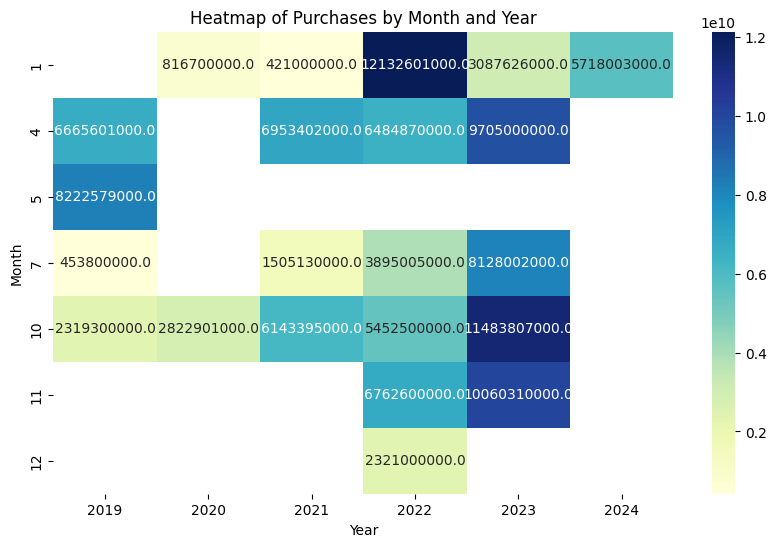

In [83]:
plt.figure(figsize=(10, 6))
pivot_table = dfb.pivot_table(index='Month', columns='Year', values='denomination', aggfunc='sum')
sb.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title('Heatmap of Purchases by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

-----

## Electoral Bonds Receiver Data Analysis

### Creating the DataFrame

In [3]:
dfr = pd.read_csv("electroral_bonds_receiver_data.csv")

### Reading the data

In [4]:
dfr.head()

,Unnamed: 0,Date of\nEncashment,Name of the Political Party,Denomination
0,0,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
1,1,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
2,2,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,10000000
3,3,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
4,4,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000


In [5]:
dfr.tail()

,Unnamed: 0,Date of\nEncashment,Name of the Political Party,Denomination
20416,20416,24/Jan/2024,JANASENA PARTY,1000000
20417,20417,24/Jan/2024,JANASENA PARTY,1000000
20418,20418,24/Jan/2024,JANASENA PARTY,1000000
20419,20419,24/Jan/2024,JANASENA PARTY,1000000
20420,20420,24/Jan/2024,JANASENA PARTY,1000000


### Exploring the data

In [6]:
dfr.shape

(20421, 4)

In [7]:
dfr.columns

Index(['Unnamed: 0', 'Date of\nEncashment', 'Name of the Political Party',
       'Denomination'],
      dtype='object')

In [8]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20421 entries, 0 to 20420
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   20421 non-null  int64 
 1   Date of
Encashment           20421 non-null  object
 2   Name of the Political Party  20421 non-null  object
 3   Denomination                 20421 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 638.3+ KB


### Filtering and exploring the _null_ values

In [9]:
dfr.isnull().sum()

Unnamed: 0                     0
Date of\nEncashment            0
Name of the Political Party    0
Denomination                   0
dtype: int64

### Data Types

In [10]:
dfr.dtypes

Unnamed: 0                      int64
Date of\nEncashment            object
Name of the Political Party    object
Denomination                    int64
dtype: object

### Changing the column name "Unnamed: 0" to "id"

In [11]:
dfr.rename(columns = {"Unnamed: 0":"id"}, inplace = True)

In [12]:
dfr.head(2)

,id,Date of\nEncashment,Name of the Political Party,Denomination
0,0,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
1,1,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000


### Renaming the columns

In [14]:
dfr.rename(columns = {
    "Date of\nEncashment": "date_of_sell",
    "Name of the Political Party": "political_party",
    "Denomination": "denomination"
}, inplace = True)

In [15]:
dfr.head(2)

,id,date_of_sell,political_party,denomination
0,0,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
1,1,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
